In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### AGGREGATE INSURANCE

In [3]:
df_ai = pd.read_csv(r"C:\Users\hi\Downloads\PHONE PE\Extracted_tables\1 Aggregate Insurance.csv")

* Data Profiling

In [4]:
print("shape",df_ai.shape)
display(df_ai.head(5))
print("_______________________________________________________________________________________________________")
print("---- CHECKING NULL VALUES ----")
print(df_ai.isnull().sum()) 
print("_______________________________________________________________________________________________________")
print("---- DROP NULL VALUES ----")
display(df_ai.drop_duplicates())
print("_______________________________________________________________________________________________________")
print("---- SUMMARY STATISTICS ----")
display(df_ai.describe())
print("_______________________________________________________________________________________________________")
print("---- CHECKING DATATYPES ----")
print(df_ai.dtypes)

shape (610, 6)


,State,Year,Quarter,Transaction_Type,Transaction_Count,Transaction_Amount
0,Andaman And Nicobar Islands,2020,2,Insurance,6,1360.0
1,Andaman And Nicobar Islands,2020,3,Insurance,41,15380.0
2,Andaman And Nicobar Islands,2020,4,Insurance,124,157975.0
3,Andaman And Nicobar Islands,2021,1,Insurance,225,244266.0
4,Andaman And Nicobar Islands,2021,2,Insurance,137,181504.0


_______________________________________________________________________________________________________
---- CHECKING NULL VALUES ----
State                 0
Year                  0
Quarter               0
Transaction_Type      0
Transaction_Count     0
Transaction_Amount    0
dtype: int64
_______________________________________________________________________________________________________
---- DROP NULL VALUES ----


,State,Year,Quarter,Transaction_Type,Transaction_Count,Transaction_Amount
0,Andaman And Nicobar Islands,2020,2,Insurance,6,1360.0
1,Andaman And Nicobar Islands,2020,3,Insurance,41,15380.0
2,Andaman And Nicobar Islands,2020,4,Insurance,124,157975.0
3,Andaman And Nicobar Islands,2021,1,Insurance,225,244266.0
4,Andaman And Nicobar Islands,2021,2,Insurance,137,181504.0
...,...,...,...,...,...,...
605,West Bengal,2023,2,Insurance,49792,65204280.0
606,West Bengal,2023,3,Insurance,58131,76359312.0
607,West Bengal,2023,4,Insurance,72712,100365562.0
608,West Bengal,2024,1,Insurance,79576,104987909.0


_______________________________________________________________________________________________________
---- SUMMARY STATISTICS ----


,Year,Quarter,Transaction_Count,Transaction_Amount
count,610.000000,610.000000,610.000000,6.100000e+02
mean,2021.888525,2.468852,19387.916393,2.586944e+07
std,1.276554,1.091773,28814.340884,4.246481e+07
min,2020.000000,1.000000,4.000000,1.199000e+03
25%,2021.000000,2.000000,527.250000,6.862045e+05
50%,2022.000000,2.000000,5752.000000,5.739489e+06
75%,2023.000000,3.000000,27002.500000,3.261257e+07
max,2024.000000,4.000000,169357.000000,2.647087e+08


_______________________________________________________________________________________________________
---- CHECKING DATATYPES ----
State                  object
Year                    int64
Quarter                 int64
Transaction_Type       object
Transaction_Count       int64
Transaction_Amount    float64
dtype: object


In [5]:
df_ai1 = df_ai.copy()
df_ai1['Year']=df_ai1['Year'].astype(str)
df_ai1['Quarter']=df_ai1['Quarter'].astype(str)
display(df_ai1.dtypes)

State                  object
Year                   object
Quarter                object
Transaction_Type       object
Transaction_Count       int64
Transaction_Amount    float64
dtype: object

* Univarient Analysis

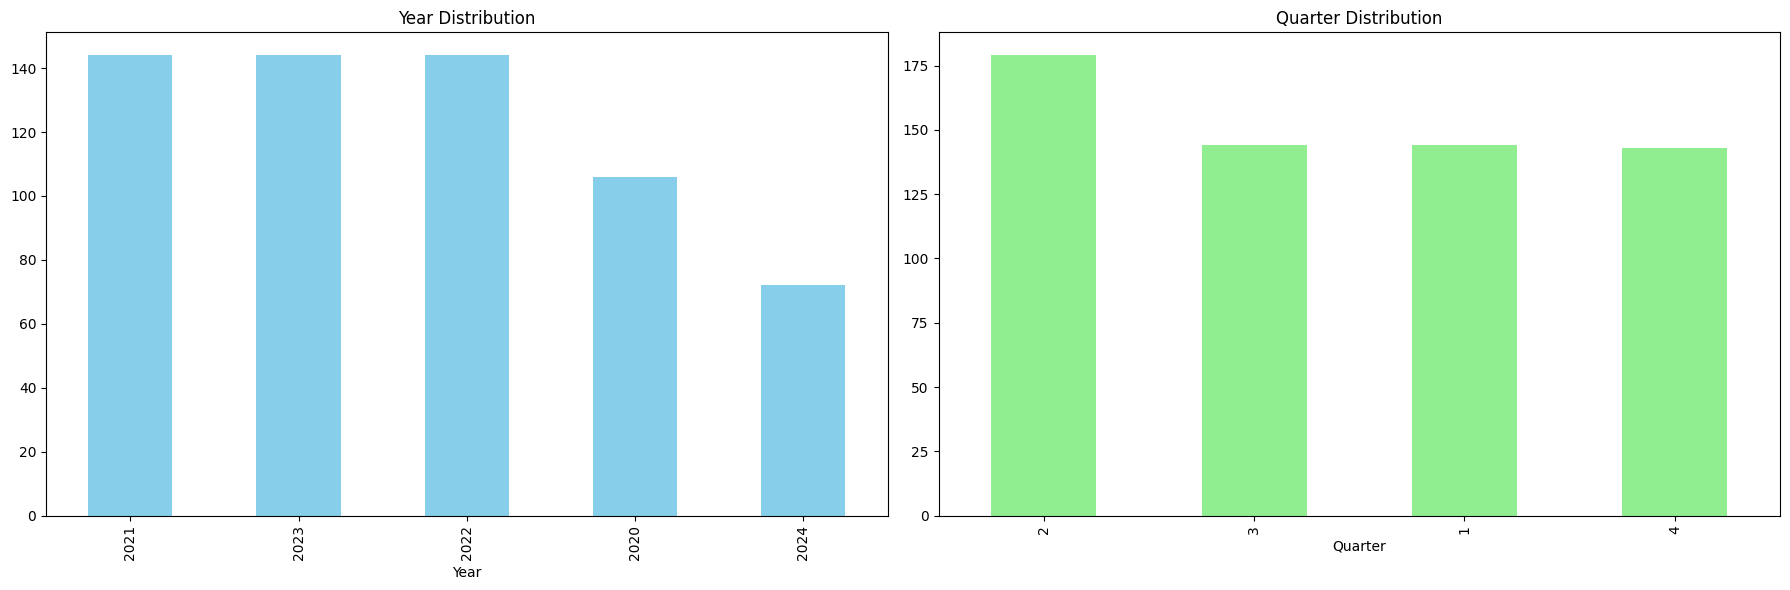

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
df_ai1['Year'].value_counts().plot.bar(ax=axs[0], color='skyblue')
axs[0].set_title('Year Distribution')

df_ai1['Quarter'].value_counts().plot.bar(ax=axs[1], color='lightgreen')
axs[1].set_title('Quarter Distribution')

plt.tight_layout()
plt.show()

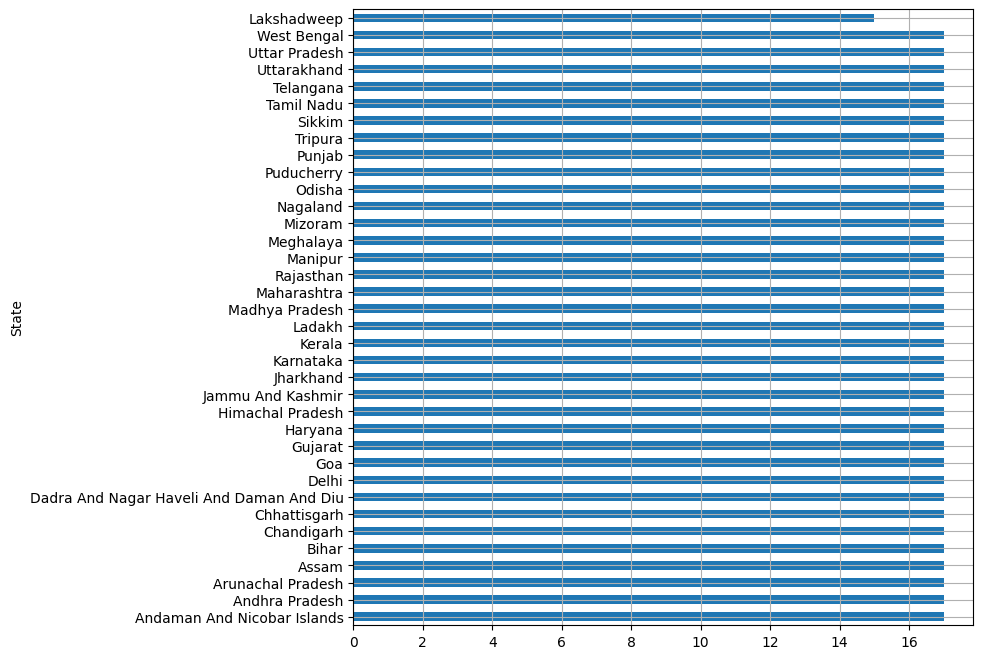

In [7]:
plt.figure(figsize=(8, 8))
df_ai1['State'].value_counts().plot.barh()
plt.grid(True)

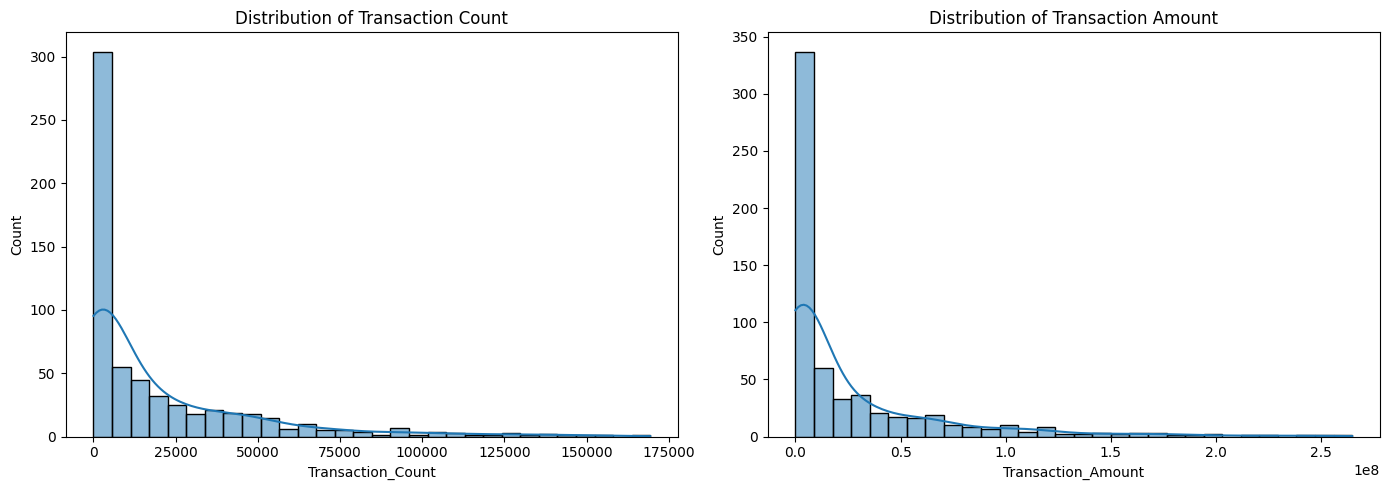

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
 
sns.histplot(df_ai1['Transaction_Count'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Transaction Count')

sns.histplot(df_ai1['Transaction_Amount'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Transaction Amount')

plt.tight_layout()
plt.show()

* Bivarient and Multivarient Analysis

In [9]:
#correlation analysis between numerical columns
df_numeric = df_ai1.select_dtypes(include=[float, int])
df1 = df_numeric.corr()
print(df1)

                    Transaction_Count  Transaction_Amount
Transaction_Count            1.000000            0.973416
Transaction_Amount           0.973416            1.000000


Transaction_Count and Transaction_Aamount: Correlation is 0.973 (very strong positive correlation)

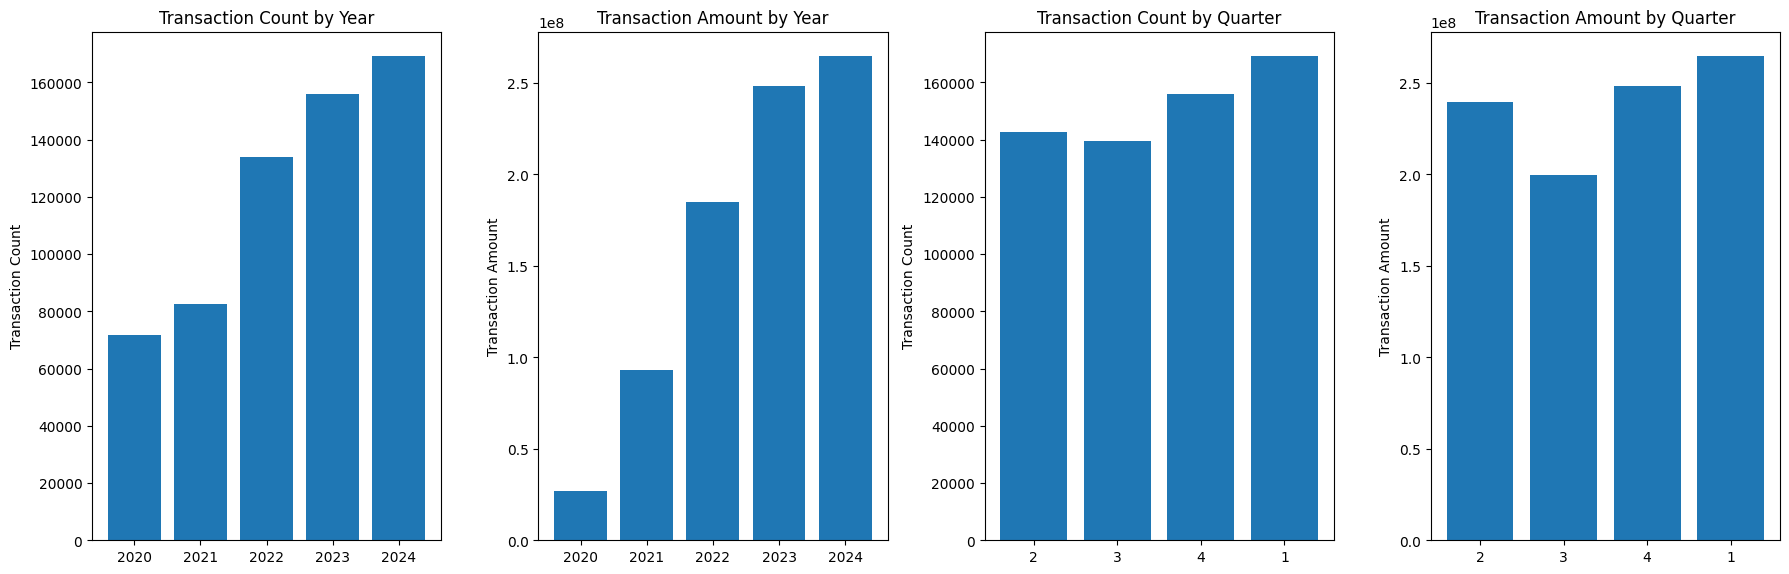

In [10]:
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

axes[0].bar(df_ai1["Year"], df_ai1["Transaction_Count"])
axes[0].set_title('Transaction Count by Year')
axes[0].set_ylabel('Transaction Count')

axes[1].bar(df_ai1["Year"], df_ai1["Transaction_Amount"])
axes[1].set_title('Transaction Amount by Year')
axes[1].set_ylabel('Transaction Amount')

axes[2].bar(df_ai1["Quarter"], df_ai1["Transaction_Count"])
axes[2].set_title('Transaction Count by Quarter')
axes[2].set_ylabel('Transaction Count')

axes[3].bar(df_ai1["Quarter"], df_ai1["Transaction_Amount"])
axes[3].set_title('Transaction Amount by Quarter')
axes[3].set_ylabel('Transaction Amount')

plt.tight_layout()
plt.show()

In [11]:
# Creating cross table using groupby
cross_table = df_ai1.groupby(['State']).agg(
    Total_Transaction_count=('Transaction_Count', 'sum'),
    Total_Transaction_amount=('Transaction_Amount', 'sum')
).reset_index()
cross_table = cross_table.sort_values(by='Total_Transaction_amount', ascending=False)

display(cross_table)

,State,Total_Transaction_count,Total_Transaction_amount
15,Karnataka,1598882,2.149900e+09
20,Maharashtra,1527685,1.894866e+09
33,Uttar Pradesh,929634,1.383863e+09
30,Tamil Nadu,971400,1.219595e+09
16,Kerala,655579,1.037914e+09
31,Telangana,750971,9.355886e+08
35,West Bengal,670838,8.244087e+08
28,Rajasthan,501621,7.228951e+08
1,Andhra Pradesh,588330,6.582789e+08
11,Haryana,465195,6.574661e+08


### AGGREGATE TRANSACTION

In [12]:
df_at = pd.read_csv(r"C:\Users\hi\Downloads\PHONE PE\Extracted_tables\2 Aggregate Transaction.csv")

* Data Profiling

In [13]:
print("shape",df_at.shape)
display(df_at.head(5))
print("_______________________________________________________________________________________________________")
print("---- CHECKING NULL VALUES ----")
print(df_at.isnull().sum()) 
print("_______________________________________________________________________________________________________")
print("---- DROP NULL VALUES ----")
display(df_at.drop_duplicates())
print("_______________________________________________________________________________________________________")
print("---- SUMMARY STATISTICS ----")
display(df_at.describe())
print("_______________________________________________________________________________________________________")
print("---- CHECKING DATATYPES ----")
print(df_at.dtypes)

shape (4674, 6)


,State,Year,Quarter,Transaction_type,Transaction_count,Transaction_amount
0,Andaman And Nicobar Islands,2018,1,Recharge & bill payments,4200,1.845307e+06
1,Andaman And Nicobar Islands,2018,1,Peer-to-peer payments,1871,1.213866e+07
2,Andaman And Nicobar Islands,2018,1,Merchant payments,298,4.525072e+05
3,Andaman And Nicobar Islands,2018,1,Financial Services,33,1.060142e+04
4,Andaman And Nicobar Islands,2018,1,Others,256,1.846899e+05


_______________________________________________________________________________________________________
---- CHECKING NULL VALUES ----
State                 0
Year                  0
Quarter               0
Transaction_type      0
Transaction_count     0
Transaction_amount    0
dtype: int64
_______________________________________________________________________________________________________
---- DROP NULL VALUES ----


,State,Year,Quarter,Transaction_type,Transaction_count,Transaction_amount
0,Andaman And Nicobar Islands,2018,1,Recharge & bill payments,4200,1.845307e+06
1,Andaman And Nicobar Islands,2018,1,Peer-to-peer payments,1871,1.213866e+07
2,Andaman And Nicobar Islands,2018,1,Merchant payments,298,4.525072e+05
3,Andaman And Nicobar Islands,2018,1,Financial Services,33,1.060142e+04
4,Andaman And Nicobar Islands,2018,1,Others,256,1.846899e+05
...,...,...,...,...,...,...
4669,West Bengal,2024,2,Merchant payments,505063040,3.129978e+11
4670,West Bengal,2024,2,Peer-to-peer payments,393935166,1.182044e+12
4671,West Bengal,2024,2,Recharge & bill payments,80431842,5.118639e+10
4672,West Bengal,2024,2,Financial Services,545945,6.830567e+08


_______________________________________________________________________________________________________
---- SUMMARY STATISTICS ----


,Year,Quarter,Transaction_count,Transaction_amount
count,4674.000000,4674.000000,4.674000e+03,4.674000e+03
mean,2020.771716,2.423834,3.877705e+07,5.930178e+10
std,1.887337,1.115556,1.401033e+08,2.366189e+11
min,2018.000000,1.000000,2.000000e+00,3.439721e+01
25%,2019.000000,1.000000,5.296100e+04,3.660864e+07
50%,2021.000000,2.000000,4.686330e+05,3.879947e+08
75%,2022.000000,3.000000,1.036904e+07,9.462976e+09
max,2024.000000,4.000000,2.008665e+09,2.835424e+12


_______________________________________________________________________________________________________
---- CHECKING DATATYPES ----
State                  object
Year                    int64
Quarter                 int64
Transaction_type       object
Transaction_count       int64
Transaction_amount    float64
dtype: object


In [14]:
df_at1 = df_at.copy()
df_at1['Year']=df_at1['Year'].astype(str)
df_at1['Quarter']=df_at1['Quarter'].astype(str)
display(df_at1.dtypes)

State                  object
Year                   object
Quarter                object
Transaction_type       object
Transaction_count       int64
Transaction_amount    float64
dtype: object

* Univarient Analysis

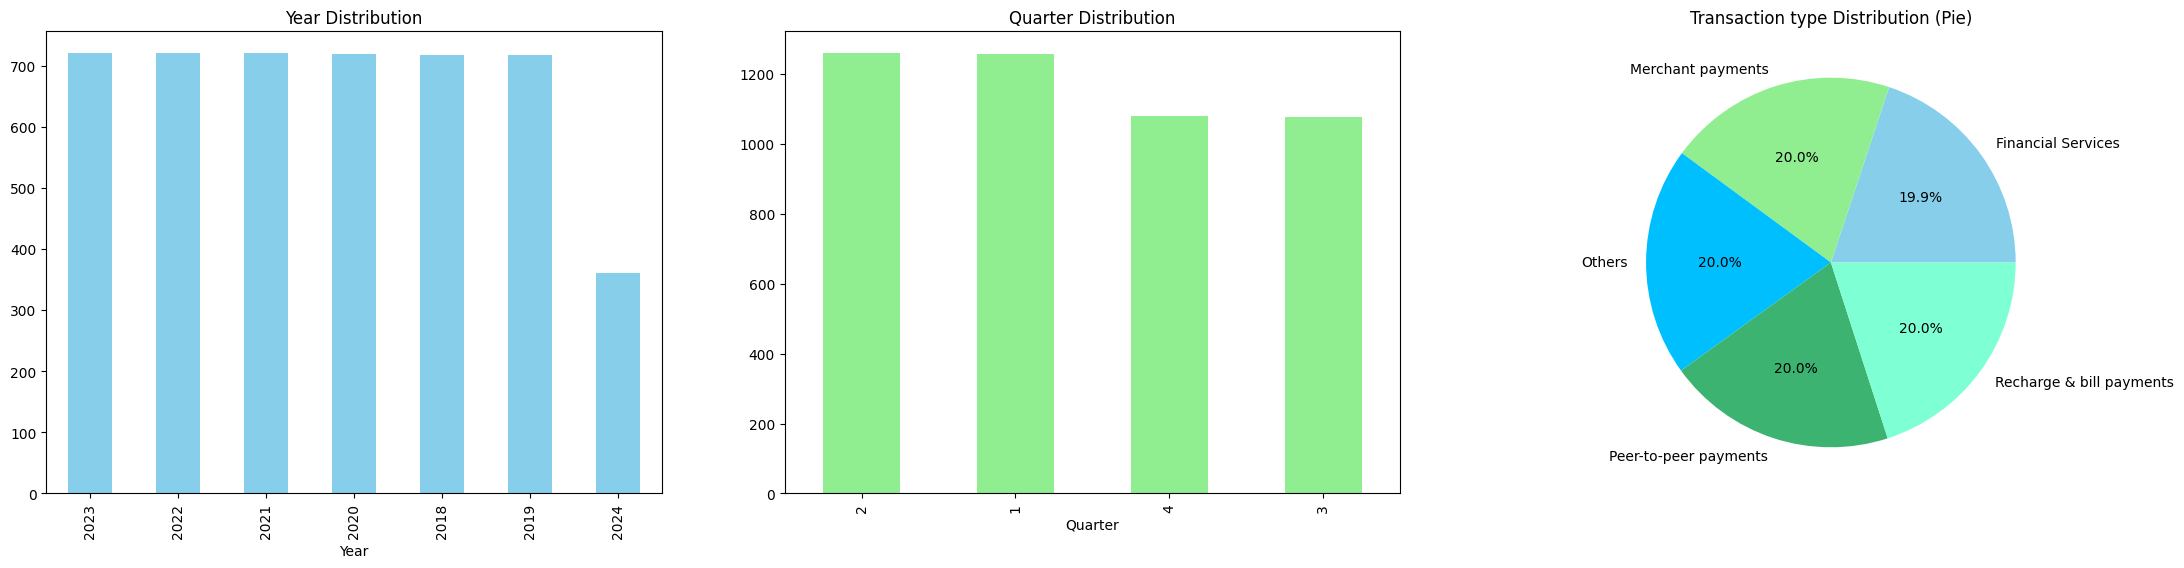

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(27, 6))  # Create 3 subplots in a single row

# First bar plot for Year Distribution
df_at1['Year'].value_counts().plot.bar(ax=axs[0], color='skyblue')
axs[0].set_title('Year Distribution')

# Second bar plot for Quarter Distribution
df_at1['Quarter'].value_counts().plot.bar(ax=axs[1], color='lightgreen')
axs[1].set_title('Quarter Distribution')

# Pie chart for Quarter Distribution
count = df_at1['Transaction_type'].value_counts().sort_index()
axs[2].pie(count, labels=count.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'deepskyblue', 'mediumseagreen', 'aquamarine'])
axs[2].set_title('Transaction type Distribution (Pie)')

plt.show()

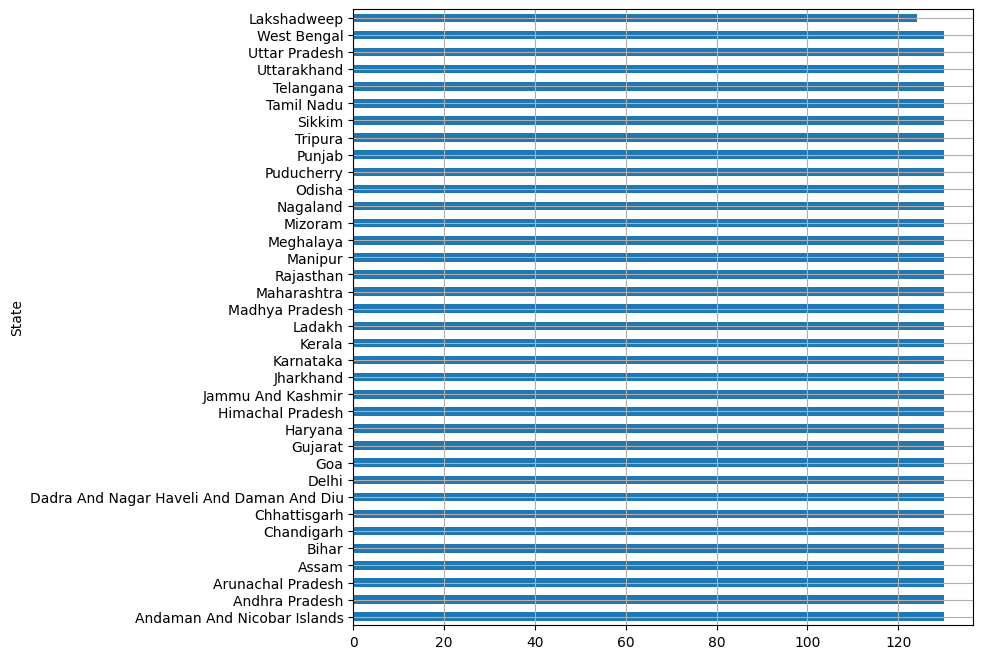

In [16]:
plt.figure(figsize=(8, 8))
df_at1['State'].value_counts().plot.barh()
plt.grid(True)

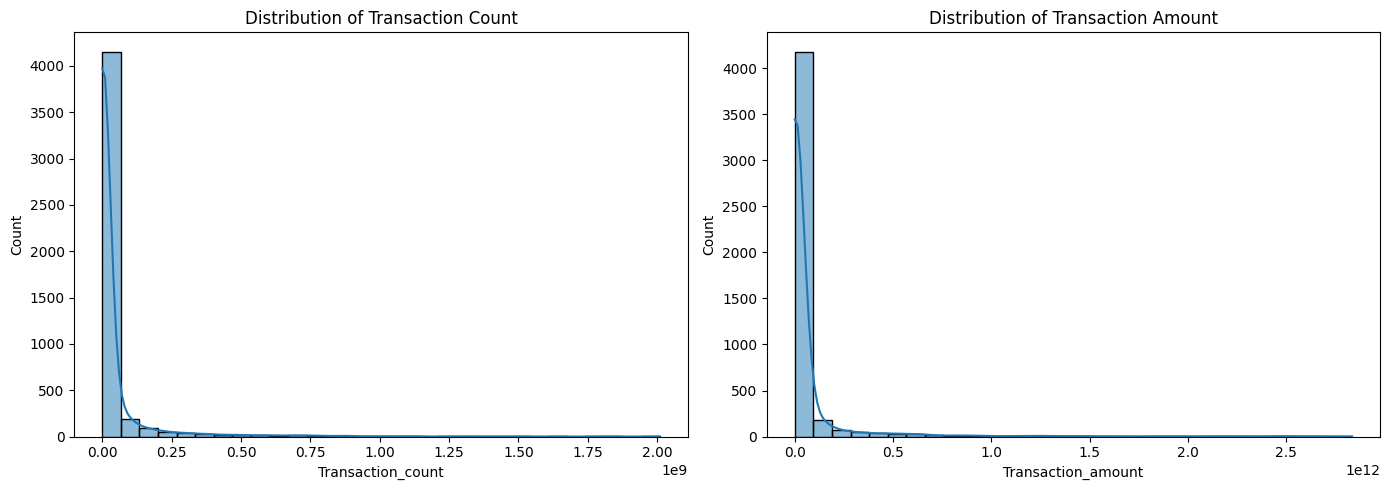

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
 
sns.histplot(df_at1['Transaction_count'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Transaction Count')

sns.histplot(df_at1['Transaction_amount'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Transaction Amount')

plt.tight_layout()
plt.show()

* Bivarient and Multivarient Analysis

In [18]:
# Group the data by Payment Type
grouped = df_at1.groupby('Transaction_type')

# Calculate the correlation for each payment type
correlation_by_payment = grouped.apply(lambda x: x['Transaction_count'].corr(x['Transaction_amount']))

print(correlation_by_payment)

Transaction_type
Financial Services          0.798307
Merchant payments           0.988757
Others                      0.899582
Peer-to-peer payments       0.995193
Recharge & bill payments    0.956253
dtype: float64


C:\Users\hi\AppData\Local\Temp\ipykernel_3504\1067019753.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_by_payment = grouped.apply(lambda x: x['Transaction_count'].corr(x['Transaction_amount']))


C:\Users\hi\AppData\Local\Temp\ipykernel_3504\78618623.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_by_transaction = df_at1.groupby('Transaction_type').apply(lambda x: x['Transaction_count'].corr(x['Transaction_amount']))


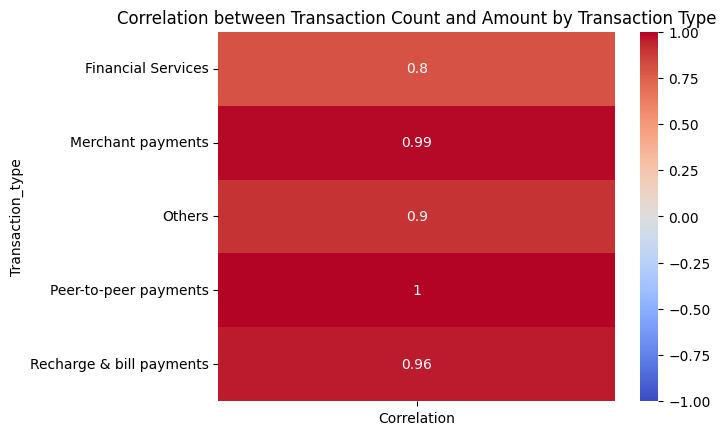

In [19]:
correlation_by_transaction = df_at1.groupby('Transaction_type').apply(lambda x: x['Transaction_count'].corr(x['Transaction_amount']))

# Convert the series to a DataFrame for heatmap plotting
correlation_df = correlation_by_transaction.reset_index()
correlation_df.columns = ['Transaction_type', 'Correlation']
correlation_df.set_index('Transaction_type', inplace=True)

# Plotting the heatmap
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation between Transaction Count and Amount by Transaction Type')
plt.show()

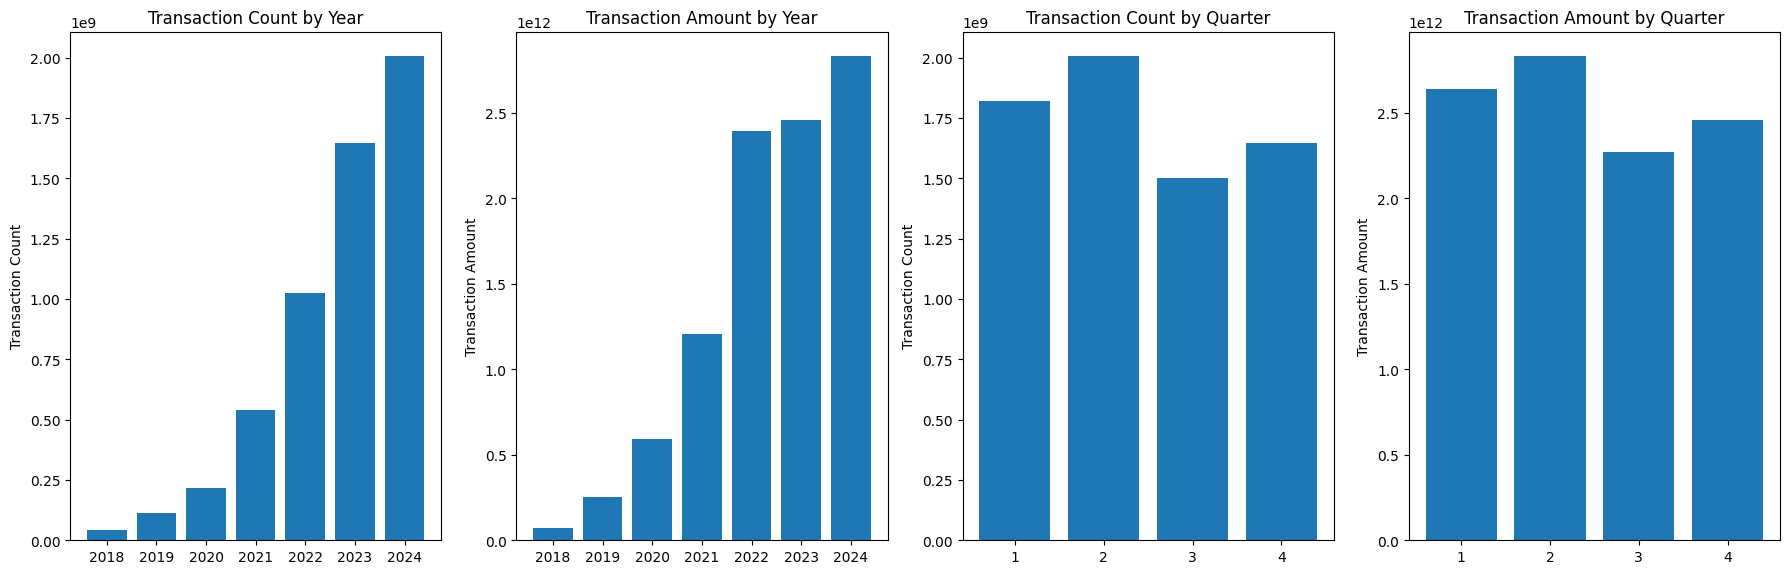

In [20]:
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

axes[0].bar(df_at1["Year"], df_at1["Transaction_count"])
axes[0].set_title('Transaction Count by Year')
axes[0].set_ylabel('Transaction Count')

axes[1].bar(df_at1["Year"], df_at1["Transaction_amount"])
axes[1].set_title('Transaction Amount by Year')
axes[1].set_ylabel('Transaction Amount')

axes[2].bar(df_at1["Quarter"], df_at1["Transaction_count"])
axes[2].set_title('Transaction Count by Quarter')
axes[2].set_ylabel('Transaction Count')

axes[3].bar(df_at1["Quarter"], df_at1["Transaction_amount"])
axes[3].set_title('Transaction Amount by Quarter')
axes[3].set_ylabel('Transaction Amount')

plt.tight_layout()
plt.show()

In [21]:
# Creating cross table using groupby
cross_table = df_at1.groupby(['State']).agg(
    Total_Transaction_count=('Transaction_count', 'sum'),
    Total_Transaction_amount=('Transaction_amount', 'sum')
).reset_index()
cross_table = cross_table.sort_values(by='Total_Transaction_amount', ascending=False)

display(cross_table)

,State,Total_Transaction_count,Total_Transaction_amount
31,Telangana,20742095154,3.424559e+13
15,Karnataka,24254755760,3.261970e+13
20,Maharashtra,25063572898,3.253590e+13
1,Andhra Pradesh,14530879817,2.799042e+13
28,Rajasthan,13129663316,2.107793e+13
33,Uttar Pradesh,13692757629,2.095363e+13
19,Madhya Pradesh,10849035767,1.536089e+13
4,Bihar,8028482926,1.402214e+13
35,West Bengal,6879447560,1.216642e+13
30,Tamil Nadu,6197425448,9.797807e+12


In [22]:
# Creating cross table using groupby
cross_table = df_at1.groupby(['Transaction_type']).agg(
    Total_Transaction_count=('Transaction_count', 'sum'),
    Total_Transaction_amount=('Transaction_amount', 'sum')
)

display(cross_table)

,Total_Transaction_count,Total_Transaction_amount
Transaction_type,,
Financial Services,111297038,1.064061e+11
Merchant payments,96993480084,5.012596e+13
Others,247471898,1.566015e+11
Peer-to-peer payments,67097258261,2.159296e+14
Recharge & bill payments,16794438370,1.085800e+13


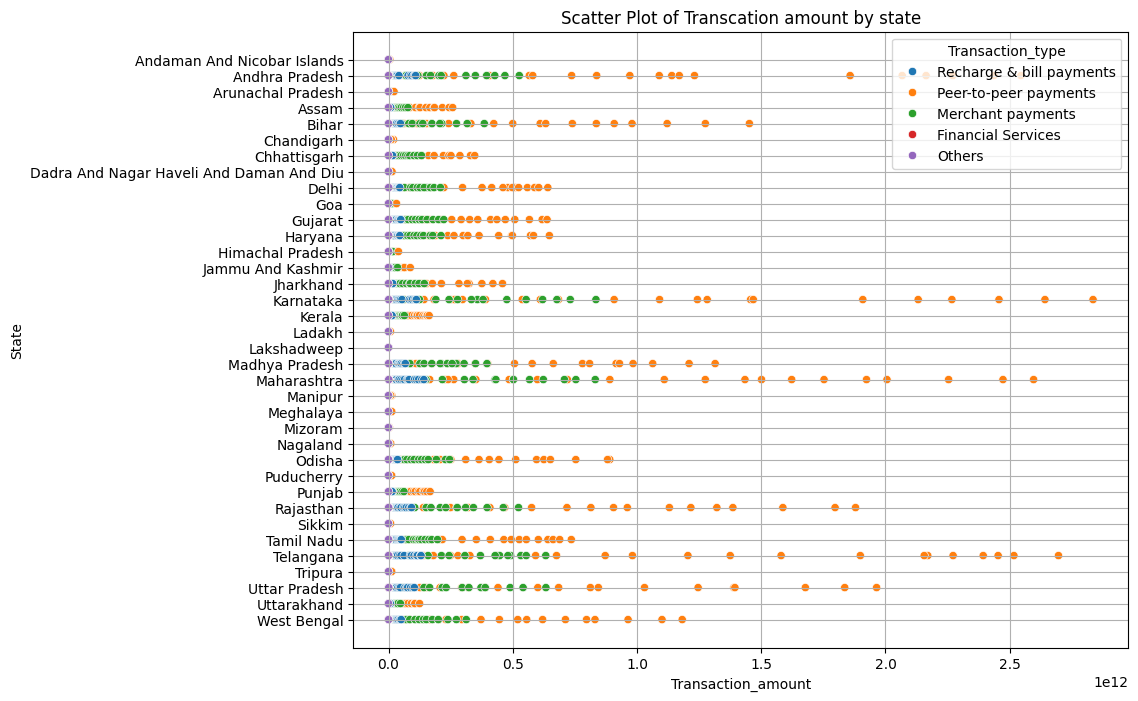

In [23]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df_at1['Transaction_amount'], y=df_at1["State"], hue=df_at1['Transaction_type'])
plt.title('Scatter Plot of Transcation amount by state')
plt.grid(True)
plt.show()

In [24]:
# Create the pivot table
pivot_table = df_at1.pivot_table(
    index='State',               # Rows: States
    columns='Transaction_type',  # Columns: Transaction Types
    values='Transaction_amount', # Values: Transaction Amounts
    aggfunc='sum'                # Aggregation function: sum of transaction amounts
)
# Display the pivot table
display(pivot_table)

Transaction_type,Financial Services,Merchant payments,Others,Peer-to-peer payments,Recharge & bill payments
State,,,,,
Andaman And Nicobar Islands,6.122677e+07,1.233661e+10,3.947383e+07,3.992645e+10,1.718901e+09
Andhra Pradesh,6.491598e+09,3.878856e+12,8.376469e+09,2.315358e+13,9.431204e+11
Arunachal Pradesh,1.077824e+08,3.556799e+10,9.142912e+07,1.665521e+11,5.433809e+09
Assam,1.312129e+09,4.890740e+11,1.424120e+09,2.166008e+12,8.662916e+10
Bihar,3.601740e+09,2.375031e+12,6.206903e+09,1.126010e+13,3.772060e+11
Chandigarh,2.186674e+08,5.602653e+10,3.159080e+08,1.828593e+11,1.372558e+10
Chhattisgarh,1.568323e+09,8.645049e+11,2.480783e+09,2.806723e+12,1.410069e+11
Dadra And Nagar Haveli And Daman And Diu,6.915743e+07,3.340582e+10,1.191959e+08,1.132151e+11,9.400759e+09
Delhi,5.535046e+09,1.809382e+12,1.357497e+10,7.277277e+12,5.164875e+11


In [25]:
# Create the pivot table
pivot_table = df_at1.pivot_table(
    index='State',               # Rows: States
    columns='Transaction_type',  # Columns: Transaction Types
    values='Transaction_count',  # Values: Transaction Amounts
    aggfunc='sum'                # Aggregation function: sum of transaction amounts
)
# Display the pivot table
display(pivot_table)

Transaction_type,Financial Services,Merchant payments,Others,Peer-to-peer payments,Recharge & bill payments
State,,,,,
Andaman And Nicobar Islands,31587,14373169,44697,10345578,3568770
Andhra Pradesh,6851772,6729051591,10129614,6506995324,1277851516
Arunachal Pradesh,58863,42430652,106360,49619213,16767670
Assam,1282597,705442681,2255168,684251940,241421328
Bihar,4819790,3694946456,10939258,3532076285,785701137
Chandigarh,185208,96728265,434228,53178413,17092383
Chhattisgarh,1357034,1483188590,3519573,989513676,311769452
Dadra And Nagar Haveli And Daman And Diu,70721,86272472,193528,45927652,14844072
Delhi,4853086,3883585276,30394339,2270401119,550695222


### AGGREGATE USER

In [26]:
df_au = pd.read_csv(r"C:\Users\hi\Downloads\PHONE PE\Extracted_tables\3 Aggregate User.csv")

In [27]:
print("shape",df_at.shape)
display(df_au.head(5))
print("_______________________________________________________________________________________________________")
print("---- CHECKING NULL VALUES ----")
print(df_au.isnull().sum()) 
print("_______________________________________________________________________________________________________")
print("---- DROP NULL VALUES ----")
display(df_au.drop_duplicates())
print("_______________________________________________________________________________________________________")
print("---- SUMMARY STATISTICS ----")
display(df_au.describe())
print("_______________________________________________________________________________________________________")
print("---- CHECKING DATATYPES ----")
print(df_au.dtypes)

shape (4674, 6)


,State,Year,Quarter,Brand,Transaction_count,Percentage
0,Andaman And Nicobar Islands,2018,1,Xiaomi,1665,0.247033
1,Andaman And Nicobar Islands,2018,1,Samsung,1445,0.214392
2,Andaman And Nicobar Islands,2018,1,Vivo,982,0.145697
3,Andaman And Nicobar Islands,2018,1,Oppo,501,0.074332
4,Andaman And Nicobar Islands,2018,1,OnePlus,332,0.049258


_______________________________________________________________________________________________________
---- CHECKING NULL VALUES ----
State                0
Year                 0
Quarter              0
Brand                0
Transaction_count    0
Percentage           0
dtype: int64
_______________________________________________________________________________________________________
---- DROP NULL VALUES ----


,State,Year,Quarter,Brand,Transaction_count,Percentage
0,Andaman And Nicobar Islands,2018,1,Xiaomi,1665,0.247033
1,Andaman And Nicobar Islands,2018,1,Samsung,1445,0.214392
2,Andaman And Nicobar Islands,2018,1,Vivo,982,0.145697
3,Andaman And Nicobar Islands,2018,1,Oppo,501,0.074332
4,Andaman And Nicobar Islands,2018,1,OnePlus,332,0.049258
...,...,...,...,...,...,...
6727,West Bengal,2022,1,Lenovo,330017,0.015056
6728,West Bengal,2022,1,Infinix,284678,0.012987
6729,West Bengal,2022,1,Asus,280347,0.012790
6730,West Bengal,2022,1,Apple,277752,0.012671


_______________________________________________________________________________________________________
---- SUMMARY STATISTICS ----


,Year,Quarter,Transaction_count,Percentage
count,6732.000000,6732.000000,6.732000e+03,6732.000000
mean,2019.647059,2.411765,5.140115e+05,0.090909
std,1.233984,1.140715,1.081772e+06,0.083401
min,2018.000000,1.000000,1.000000e+01,0.005158
25%,2019.000000,1.000000,9.354000e+03,0.020513
50%,2020.000000,2.000000,8.472250e+04,0.057718
75%,2021.000000,3.000000,4.555808e+05,0.146007
max,2022.000000,4.000000,1.134094e+07,0.478367


_______________________________________________________________________________________________________
---- CHECKING DATATYPES ----
State                 object
Year                   int64
Quarter                int64
Brand                 object
Transaction_count      int64
Percentage           float64
dtype: object


In [28]:
df_au1 = df_au.copy()
df_au1['Year']=df_au1['Year'].astype(str)
df_au1['Quarter']=df_au1['Quarter'].astype(str)
display(df_au1.dtypes)

State                 object
Year                  object
Quarter               object
Brand                 object
Transaction_count      int64
Percentage           float64
dtype: object

* Univarient Analysis

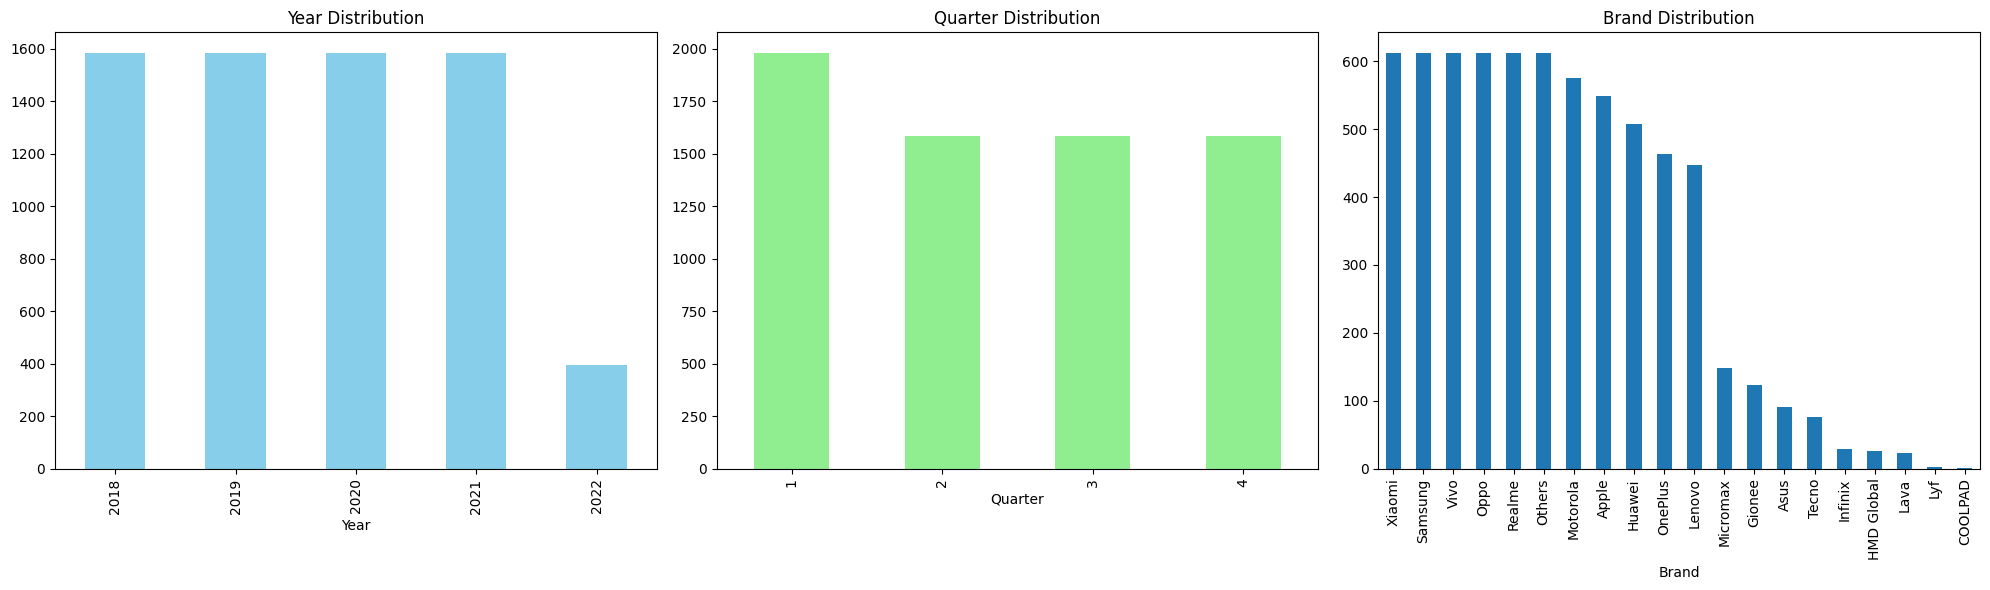

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
df_au1['Year'].value_counts().plot.bar(ax=axs[0], color='skyblue')
axs[0].set_title('Year Distribution')

df_au1['Quarter'].value_counts().plot.bar(ax=axs[1], color='lightgreen')
axs[1].set_title('Quarter Distribution')

df_au1['Brand'].value_counts().plot.bar(ax=axs[2])
axs[2].set_title('Brand Distribution')

plt.tight_layout()
plt.show()

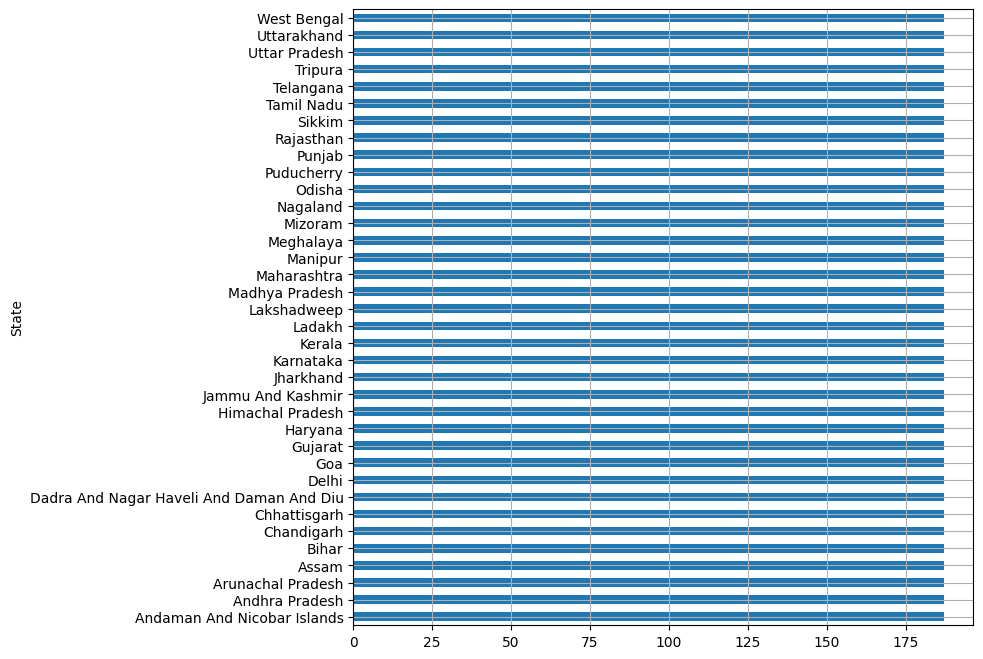

In [30]:
plt.figure(figsize=(8, 8))
df_au1['State'].value_counts().plot.barh()
plt.grid(True)

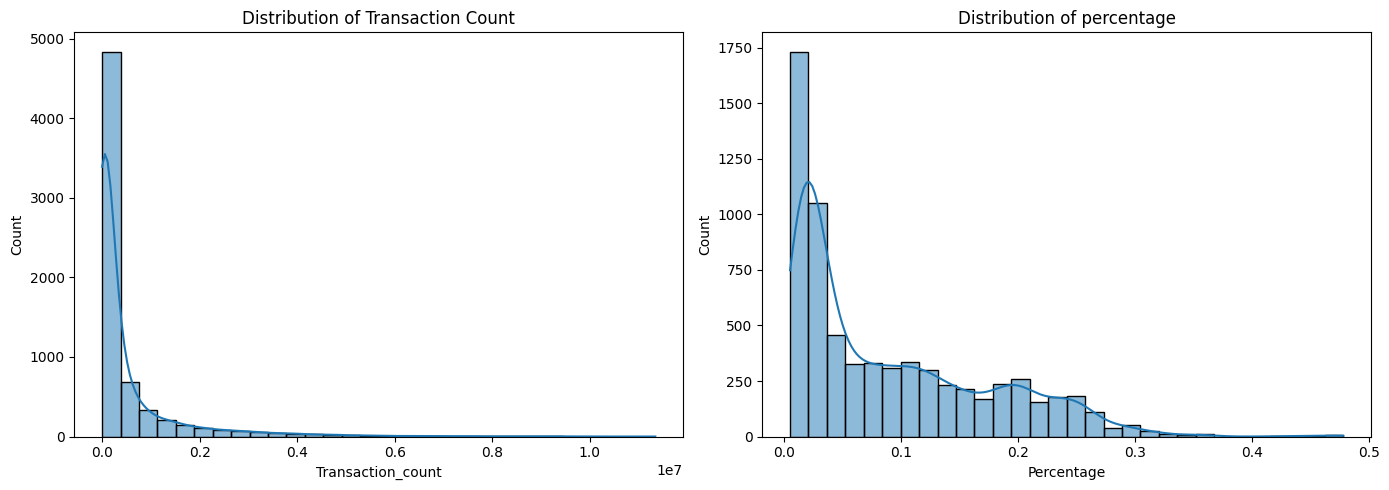

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
 
sns.histplot(df_au1['Transaction_count'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Transaction Count')

sns.histplot(df_au1['Percentage'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of percentage')

plt.tight_layout()
plt.show()

* Bivarient and Multivarient Analysis

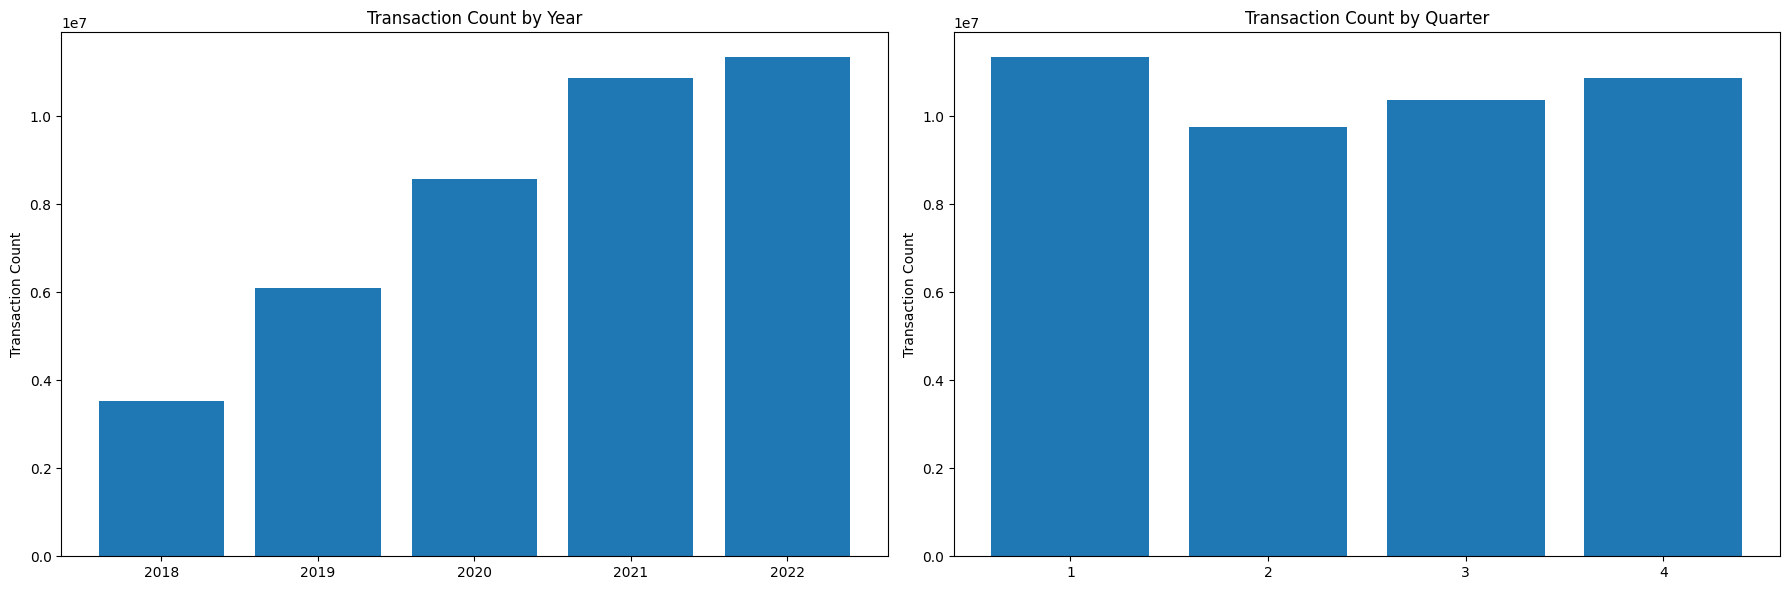

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

axes[0].bar(df_au1["Year"], df_au1["Transaction_count"])
axes[0].set_title('Transaction Count by Year')
axes[0].set_ylabel('Transaction Count')

axes[1].bar(df_au1["Quarter"], df_au1["Transaction_count"])
axes[1].set_title('Transaction Count by Quarter')
axes[1].set_ylabel('Transaction Count')

plt.tight_layout()
plt.show()

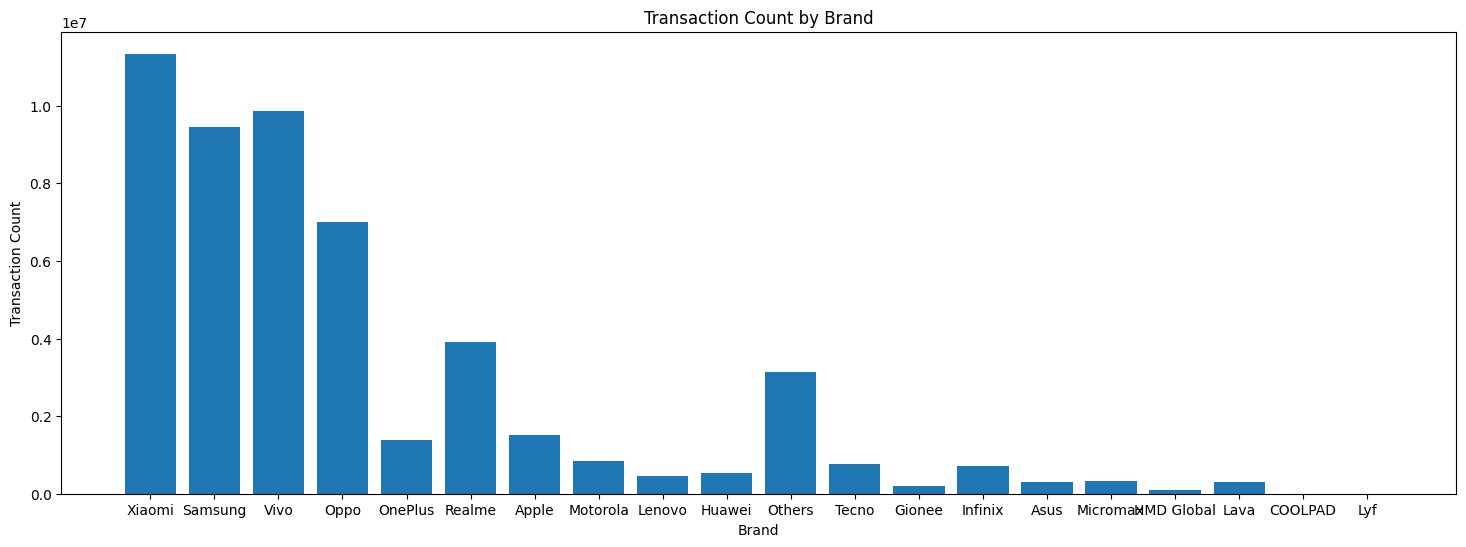

In [33]:
plt.figure(figsize=(18, 6))
# Create a bar plot
plt.bar(df_au1["Brand"], df_au1["Transaction_count"])

# Add title and labels
plt.title('Transaction Count by Brand')
plt.xlabel('Brand')
plt.ylabel('Transaction Count')
plt.show()

In [35]:
# Step 1: Calculate the total transaction count for each state
state_agg = df_au1.groupby(['State']).agg(
    Total_Transaction_Count_State=('Transaction_count', 'sum')
).reset_index()

# Step 2: Calculate the total transaction count for each brand within each state
brand_agg = df_au1.groupby(['State', 'Brand']).agg(
    Total_Transaction_Count_Brand=('Transaction_count', 'sum')
).reset_index()

# Step 3: Identify the brand with the highest transaction count for each state
idx = brand_agg.groupby(['State'])['Total_Transaction_Count_Brand'].idxmax()
top_brands = brand_agg.loc[idx].rename(columns={'Brand': 'Top_Brand'})

# Step 4: Merge the state-level and brand-level data
cross_table = state_agg.merge(top_brands[['State', 'Top_Brand', 'Total_Transaction_Count_Brand']], on='State')

# Sort by the total transaction count in the state in descending order
cross_table = cross_table.sort_values(by='Total_Transaction_Count_State', ascending=False)

# Calculate the percentage contribution of the top brand in each state
cross_table['Percentage'] = (cross_table['Total_Transaction_Count_Brand'] / cross_table['Total_Transaction_Count_State']) * 100

# Display the final table
display(cross_table)

,State,Total_Transaction_Count_State,Top_Brand,Total_Transaction_Count_Brand,Percentage
20,Maharashtra,452075011,Xiaomi,112867939,24.966640
33,Uttar Pradesh,355969633,Xiaomi,91026031,25.571291
15,Karnataka,291372780,Xiaomi,74495837,25.567192
1,Andhra Pradesh,225414835,Xiaomi,56579876,25.100334
28,Rajasthan,215645588,Vivo,49461060,22.936273
31,Telangana,211907753,Xiaomi,54790200,25.855684
35,West Bengal,206129775,Xiaomi,54165446,26.277352
30,Tamil Nadu,193665028,Xiaomi,45699777,23.597331
10,Gujarat,180731308,Vivo,41169122,22.779187
19,Madhya Pradesh,180662446,Xiaomi,46258633,25.605008
